### Contributers:
#### 1. [Sahil Bhandari (Co-Lead)](https://github.com/returnofsahil)
#### 2. [Yu Hang Ng](https://github.com/nyhDatAIQC)
#### 3. [Sarath Lonappan](https://github.com/sarathklonappan)
#### 4. [Tinotenda Mangarai]()
#### 5. [Yamuna V](https://github.com/)
#### 6. [AKASH RAJ](https://github.com/akashraj071)
#### 7. [Yahaya Musa Kayode](https://github.com/yahayakayode)
#### 8. [Anastasiia Marchenko]()


In [301]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
import seaborn as sns

In [302]:
# Loading Datasets
df = pd.read_csv('./Data/Final-data.csv',sep=',')
df_math = pd.read_csv('./Data/student-mat.csv',sep=';')
df_por = pd.read_csv('./Data/student-por.csv',sep=';')
df_feat = pd.read_csv('./Data/Final_feat.csv')

In [303]:
df_feat.head()

,Unnamed: 0,school,sex,age,reason,traveltime,studytime,failures,activities,freetime,health,absences,Subject,Final_Score,ses_status,avg_alc,social_score_category
0,0,GP,F,18,course,2,2,0,no,3,3,6,1,6.0,Medium,1.0,Neutral
1,1,GP,F,17,course,1,2,0,no,3,3,4,1,5.0,Medium,1.0,Very Bad
2,2,GP,F,15,other,1,2,3,no,3,3,10,1,8.0,High,2.5,Very Bad
3,3,GP,F,15,home,1,3,0,yes,2,5,2,1,15.0,High,1.0,Very Bad
4,4,GP,F,16,home,1,2,0,no,3,5,4,1,9.0,Medium,1.5,Very Bad


In [304]:
df_copy = df.copy(deep=True)

In [305]:
df.head()

,Unnamed: 0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Subject
0,0,GP,F,18,U,GT3,A,4,4,at_home,...,3,4,1,1,3,6,5,6,6,1
1,1,GP,F,17,U,GT3,T,1,1,at_home,...,3,3,1,1,3,4,5,5,6,1
2,2,GP,F,15,U,LE3,T,1,1,at_home,...,3,2,2,3,3,10,7,8,10,1
3,3,GP,F,15,U,GT3,T,4,2,health,...,2,2,1,1,5,2,15,14,15,1
4,4,GP,F,16,U,GT3,T,3,3,other,...,3,2,1,2,5,4,6,10,10,1


In [306]:
df_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [307]:
df_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


### EDA For features 1 - 12

In [308]:
# Function
def bar_plot_column(x):
  y=df.groupby(x)['G3'].mean().sort_values().reset_index()
  fig = px.bar(y, x=x, y='G3')
  fig.show()

In [309]:
we_need=['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian']
for i in we_need:
  bar_plot_column(i)

School GP has a higher G3 grade than MS. The grades are 10.51 and 11.63 respectively.

Females have slightly better grades than males.The grades are 11.44 and 11.23 respectively.

Students having age 20 have the highest grades while age 22 students have the lowest grades.The number of students having age 22 is less thus resulting in low mean G3 grade.Students having age 19 has the second lowest grades.

Students living in Urban areas has better grades than students living in Rural areas.

The students coming from family size less than 3 members have higher grades than students coming from family size greater than 3.This may be due to the excess time the students spent with their siblings.

Students whose parents live apart perform better in studies than students whose parents live together.

Students whose fathers are illiterate perform excellently than other students.Fathers will have a small role in teaching their children.

Students whose mothers have higher education score better than other students.

Students who have joined the respective schools because of reputation have better grades than other students.Students having schools near to their homes have second highest grades as they might get more time to study.

Students having Mothers working in the health industry secured higher grades than other students.

Students having fathers working as teachers perform better than other students.This may happen when fathers teach their students.

Students who have their guardian as father perform slightly better than other students.

In [310]:

def pie_chart_dist(x):
  counts=df[x].value_counts()

  fig=px.pie(counts,values=counts.values,names=counts.index)
  fig.update_layout(title="Distribution of '{}'".format(x),showlegend=True)
  fig.show()

In [311]:
for i in we_need:
  pie_chart_dist(i)

In [312]:
def violin_plot(x):
  fig = go.Figure()

  fig.add_trace(go.Violin(x=df[x] [df['school'] == 'MS'],
                        y=df['G3'][ df['school'] == 'MS'],
                        name='MS',
                        side='negative',
                        line_color='blue')
             )
  fig.add_trace(go.Violin(x=df[x][ df['school'] == 'GP' ],
                        y=df['G3'][ df['school'] == 'GP' ],
                        name='GP',
                        side='positive',
                        line_color='orange')
             )
  fig.update_traces(meanline_visible=True)
  fig.update_layout(title="Violin Plot for '{}' in MS and GP Schools".format(x),
        xaxis_title=x,
        yaxis_title="G3",
        violinmode='overlay')
  fig.show()


In [313]:
we_need3=['sex', 'age', 'address', 'famsize', 'Pstatus','Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian']
for j in we_need3:
  violin_plot(j)

In [314]:
# Treemap
fig = px.treemap(data_frame=df_feat,path=['school','Subject','ses_status'],values='Final_Score')
fig.show()

In [315]:
fig = px.treemap(data_frame=df_feat,path=['school','Subject','social_score_category'],values='Final_Score')
fig.show()
# Irrespective of the subjects / Schools we can see that studuents having excellent social_score_category are very less in number

### Inference
The males and females of GP school has a higher grade mean than MS school.This depicts the quality of the school.This may be also due to the low count of students in MS school.

The students of age 20 who belong to GP school has better grade mean.The worst grade mean shown in this plot in for students with age 22.This is due to the low number of students of that age. The second lowest grade is for students with age 21 of MS school.This may also be due to the small count of students of that age.

Students living in Urban areas have better grades than those in Rural areas.

The students having family size less than 3 of MS school have higher grade mean than students having family size greater than 3 of GP school. The students having family size less than 3 of MS school have slightly higher grade mean than students having family size greater than 3 of GP school.

Students of MS school whose parents are together have better grade mean than those whose parents are apart. Students of GP school whose parents are apart have better grade mean than those whose parents are together .

Students with mothers having higher education of MS school have higher grade than others.Students whose mothers are illiterate perform better in GP school than others.

Students whose fathers have higher education in MS school has higher grades than other.In case of GP school, students whose fathers are illiterate have better grades than others.

Students with mothers having teacher profession in MS school have higher grades than others.Students with mothers having job in the healthcare department in GP school perform better than others.

Students with fathers having teacher’s job in MS school have higher grades than others.Students with fathers having teacher’s job in GP school have higher grades than others followed by fathers having job in health department school has higher grades than other.In case of GP school, students whose fathers are illiterate have better grades than others.

Students who have joined the respective schools based on the overall quality of the school have higher grades than all other students.

Students of MS school having a father as their guardian have higher grades than other students.Students of GP have almost grade means even if their guardian is father or mother. Students whose guardian is others perform worse.This is due to the lack of care and love they get from parents.

In [316]:
fig = px.box(df, y='age')
fig.show()

# Age 22 is an outlier.The minimum age is 15. The median is 17.

# EDA for features 13 - 23

In [317]:
# create a histogram with a density curve of final scores
fig = ff.create_distplot(
    [df["G3"]], 
    ['Final Grade'], 
    colors=['indianred'],
    show_hist=True, 
    show_curve=True,
    bin_size=0.5
)

# set the title and axis labels of the chart
fig.update_layout(title='Distribution of Final Score',
                   xaxis_title='Final Period Grades',
                   yaxis_title='Density')

# display the chart
fig.show()

In [318]:
# calculate the mean grade
mean = df['G3'].mean()

# create a histogram of final grades
fig = px.histogram(df, x='G3', nbins=20, opacity=0.75)

# add a vertical line showing the mean
fig.add_shape(type='line', x0=mean, x1=mean, y0=0, y1=1, line=dict(color='red', width=10))

# set the title and axis labels of the chart
fig.update_layout(title='Distribution of Final Score',
                  xaxis_title='Final Period Grades',
                  yaxis_title='Count')

# display the chart
fig.show()

In [319]:
# create a boxplot of final grades to identify outliers
fig = px.box(df, y='G3')

# set the title and axis labels of the chart
fig.update_layout(title='Distribution of Final Score',
                  xaxis_title='',
                  yaxis_title='Final Period Grades')

# display the chart
fig.show()

In [320]:
mean = df['G3'].min()
mean

0

In [321]:
# calculate the correlation matrix
df_corr = pd.DataFrame(df[["G1", "G2", "G3"]])
corr_matrix = df_corr.corr()

# create a heatmap using Plotly
fig = go.Figure(data=go.Heatmap(z=corr_matrix.values,
                                 x=corr_matrix.columns,
                                 y=corr_matrix.index,
                                 colorscale='Viridis',
                                 text=corr_matrix.round(2).values))

# set the title of the chart
fig.update_layout(title='Correlation Heatmap for Grades')

# add labels to the heatmap
fig.update_layout(
    xaxis=dict(side='top'),
    yaxis=dict(title='Features'),
    annotations=[dict(
        x=x_val,
        y=y_val,
        text=str(text_val),
        font=dict(color='white'),
        showarrow=False
    )
        for y_val, y in enumerate(corr_matrix.index)
        for x_val, x in enumerate(corr_matrix.columns)
        for text_val in [corr_matrix.loc[y, x].round(2)]
        if x_val < y_val
])

# display the chart
fig.show()

## Inferences For Final Score
The distribution shows us that the highest distribution is near 10 , 11

Also there seems to be strong correlation between G1,G2 Vs G3 .. 

In [322]:
df['traveltime'].value_counts()

traveltime
1    623
2    320
3     77
4     24
Name: count, dtype: int64

In [323]:
counts = df['traveltime'].value_counts(normalize=True) * 100
fig = px.bar(counts, x=counts.index, y=counts.values, text=counts.values, 
             labels={'x': 'Travel Time', 'y': 'Percentage'}, 
             title='Distribution of Students by Travel Time')

# add percentage labels to the bars
fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')

# add x-axis label
fig.update_xaxes(title_text='Travel Time', title_font=dict(size=14))

# show the plot
fig.show()

In [324]:
# maping traveltime values to human-readable labels
time_labels = {
    1: '<15 min.',
    2: '15 to 30 min.',
    3: '30 min. to 1 hour',
    4: '>1 hour'
}
df['traveltime'] = df['traveltime'].map(time_labels)

# mean number of students in each category
mean = df.groupby('traveltime')['G3'].mean()
# create a bar graph traveltime vs G3
fig = px.bar(mean, 
             labels={'traveltime': 'Travel Time', 'G3': 'Final Period Grade'})

# set the title of the graph
fig.update_layout(title_text='Average Final Period Math Grade vs. Travel time',
                 yaxis_title="Average")

# display the graph
fig.show()

In [325]:
corr = pd.DataFrame(df_copy[['G3','traveltime']])
corr_matrix = corr.corr()
fig = px.imshow(corr_matrix,text_auto=True)
fig.show()

## Inferences For Travel Time 
About 60 % of the students have traval time between 15 to 30m with between 30m to 1 hr coming at the 2nd place with the 30% distribution
But when we it With Final Score we can observe regardless of the time the score seems to have little impact plus it is has very low negative  correlation with Final Score

In [326]:
counts = df['studytime'].value_counts(normalize=True) * 100
fig = px.bar(counts, x=counts.index, y=counts.values, text=counts.values, 
             labels={'x': 'Study Time', 'y': 'Percentage'}, 
             title='Distribution of Students by Study Time')

# add percentage labels to the bars
fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')

# add x-axis label
fig.update_xaxes(title_text='Study Time', title_font=dict(size=14))

# show the plot
fig.show()

In [327]:
# maping traveltime values to human-readable labels
studytime_labels = {
    1: '<2 hours',
    2: '2 to 5 hours',
    3: '5 to 10 hours',
    4: '>10 hours'
}
df['studytime'] = df['studytime'].map(studytime_labels)

# count the number of students in each category
mean = df.groupby('studytime')['G3'].mean()
# create a bar graph studytime vs G3
fig = px.bar(mean, 
             labels={'studytime': 'Study Time', 'G3': 'Final Period Grade'})

# set the title of the graph
fig.update_layout(title_text='Average Final Period Math Grade vs. Study time',
                 yaxis_title="Average Final sCore")

# display the graph
fig.show()

In [328]:
df["studytime"].value_counts()

studytime
2 to 5 hours     503
<2 hours         317
5 to 10 hours    162
>10 hours         62
Name: count, dtype: int64

In [329]:
corr = pd.DataFrame(df_copy[['G3','studytime']])
corr_matrix = corr.corr()
fig = px.imshow(corr_matrix,text_auto=True)
fig.show()

## Inferences for studytime
Most students study between less than 2hrs (30%) and between 2 and 5hrs (48%)
Despite the increase in study hours the same cannot be said for the increase in grade . Overall Studytime has very little correlation with G3

In [330]:
counts = df['failures'].value_counts(normalize=True) * 100
fig = px.bar(counts, x=counts.index, y=counts.values, text=counts.values, 
             labels={'x': 'Failures', 'y': 'Percentage'}, 
             title='Distribution of Students by Failures')

# add percentage labels to the bars
fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')

# add x-axis label
fig.update_xaxes(title_text='Failures', title_font=dict(size=14))

# show the plot
fig.show()

In [331]:
ses_df = pd.DataFrame(df[['sex', 'address', 'famsize' , 'Pstatus','Medu','Fedu','Mjob','Fjob',
                    'guardian','famsup','schoolsup', 'internet','paid','higher','G3']])

In [332]:
fedu_labels = {
    0: 'None',
    1: '- primary education (4th grade)',
    2: '5th to 9th grade',
    3: 'secondary education',
    4: 'higher education'
}
ses_df['Fedu'] = ses_df['Fedu'].map(fedu_labels)
# mean the number of students in each category
mean = df.groupby('failures')['G3'].mean()
# create a bar graph failures vs G3
fig = px.bar(mean, 
             labels={'failures': 'Failures', 'G3': 'Final Period Grade'})

# set the title of the graph
fig.update_layout(title_text='Final Period Math Grade vs. Failures',
                 yaxis_title="Average Final Grade")

# display the graph
fig.show()

In [333]:
# get value counts for the 'schoolsup' column
counts = df['schoolsup'].value_counts()
# create a pie chart
fig = px.pie(counts, values=counts.values, names=counts.index)
fig.update_layout(title="Distribution of Students with extra educational support", showlegend=True)
fig.show()

In [334]:
# average the number of students in each category
mean = df.groupby('schoolsup')['G3'].mean()
# create a bar graph schoolsup vs G3
fig = px.bar(mean, 
             labels={'schoolsup': "extra educational support", 'Final_G': 'Final Period Grade'})

# set the title of the graph
fig.update_layout(title_text="Mean Final Period Grade vs. extra educational support",
                 yaxis_title="Average Final Grade")

# display the graph
fig.show()

In [335]:
# get value counts for the 'famsup' column
counts = df['famsup'].value_counts()
# create a pie chart
fig = px.pie(counts, values=counts.values, names=counts.index)
fig.update_layout(title="Distribution of Students with family educational support", showlegend=True)
fig.show()

In [336]:
# average the number of students in each category
mean = df.groupby('famsup')['G3'].mean()
# create a bar graph famsup vs G3
fig = px.bar(mean, 
             labels={'famsup': "family educational support", 'Final_G': 'Final Period Grade'})

# set the title of the graph
fig.update_layout(title_text="Mean Final Period Grade vs. family educational support",
                 yaxis_title="Average Final Grade")

# display the graph
fig.show()

In [337]:
# get value counts for the 'famsup' column
counts = df['paid'].value_counts()
# create a pie chart
fig = px.pie(counts, values=counts.values, names=counts.index)
fig.update_layout(title="Distribution of Students with extra paid classes within the course subject", showlegend=True)
fig.show()

In [338]:
# average the number of students in each category
mean = df.groupby('paid')['G3'].mean()
# create a bar graph paid vs G3
fig = px.bar(mean, 
             labels={'paid': "extra paid classes within the course subject ", 'Final_G': 'Final Period Grade'})

# set the title of the graph
fig.update_layout(title_text="Mean Final Period Grade vs. extra paid classes within the course subject ",
                 yaxis_title="Average Final Grade")

# display the graph
fig.show()

In [339]:
# get value counts for the 'activities' column
counts = df['activities'].value_counts()
# create a pie chart
fig = px.pie(counts, values=counts.values, names=counts.index)
fig.update_layout(title="Distribution of Students with extra-curricular activities", showlegend=True)
fig.show()

In [340]:
# average the number of students in each category
mean = df.groupby('activities')['G3'].mean()
# create a bar graph activities vs G3
fig = px.bar(mean, 
             labels={'activities': "extra-curricular activities", 'Final_G': 'Final Period Grade'})

# set the title of the graph
fig.update_layout(title_text="Mean Final Period Grade vs. extra-curricular activities",
                 yaxis_title="Average Final Grade")

# display the graph
fig.show()

In [341]:
# get value counts for the 'nursery' column
counts = df['nursery'].value_counts()
# create a pie chart
fig = px.pie(counts, values=counts.values, names=counts.index)
fig.update_layout(title="Distribution of Students who attended nursery school", showlegend=True)
fig.show()

In [342]:
# count the number of students in nursery category
mean = df.groupby('nursery')['G3'].mean()
# create a bar graph nursery vs G3
fig = px.bar(mean, 
             labels={'nursery': 'Attended nursery school ', 'G3': 'Final Period Grade'})

# set the title of the graph
fig.update_layout(title_text='Average Final Period Math Grade vs. Attended nursery school',
                 yaxis_title="Average Final Grade")

# display the graph
fig.show()

In [343]:
# get value counts for the 'higher' column
counts = df['higher'].value_counts()
# create a pie chart
fig = px.pie(counts, values=counts.values, names=counts.index)
fig.update_layout(title="Distribution of Students who want to take higher education", showlegend=True)
fig.show()

In [344]:
# mean number of students in nursery category
mean = df.groupby('higher')['G3'].mean()
# create a bar graph higher vs G3
fig = px.bar(mean, 
             labels={'higher': 'Students who want to take higher education', 'G3': 'Final Period Grade'})

# set the title of the graph
fig.update_layout(title_text='Average Final Period Math Grade vs. Students who want to take higher education',
                 yaxis_title="Average Final Grade")

# display the graph
fig.show()

### Inference for students who want to take higher education
About 90 % of the students want to pursue higher education 

and there seems to be a stark differnce in terms of grades. 

Those who want to pusue higher education seen to have Final Grade up by  3 points

In [345]:
# get value counts for the 'internet' column
counts = df['internet'].value_counts()
# create a pie chart
fig = px.pie(counts, values=counts.values, names=counts.index)
fig.update_layout(title="Distribution of Students with internet", showlegend=True)
fig.show()

In [346]:
# average number of students in nursery category
mean = df.groupby('internet')['G3'].mean()
# create a bar graph higher vs G3
fig = px.bar(mean, 
             labels={'internet': 'Internet', 'G3': 'Final Period Grade'})

# set the title of the graph
fig.update_layout(title_text='Average Final Period Math Grade vs. Students with internet',
                 yaxis_title="Average Final Grade")

# display the graph
fig.show()

In [347]:
# get value counts for the 'romantic' column
counts = df['romantic'].value_counts()
# create a pie chart
fig = px.pie(counts, values=counts.values, names=counts.index)
fig.update_layout(title="Distribution of Students in romantic relationship", showlegend=True)
fig.show()

In [348]:
# average number of students in nursery category
mean = df.groupby('romantic')['G3'].mean()
# create a bar graph higher vs G3
fig = px.bar(mean, 
             labels={'romantic': 'Romantic', 'G3': 'Final Period Grade'})

# set the title of the graph
fig.update_layout(title_text='Average Final Period Math Grade vs. Students in romantic relationships',
                 yaxis_title="Average Final Grade")

# display the graph
fig.show()

In [349]:
df[["age", "G1", "G2", "G3"]].describe()

,age,G1,G2,G3
count,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,11.213602,11.246169,11.341954
std,1.239975,2.983394,3.285071,3.864796
min,15.000000,0.000000,0.000000,0.000000
25%,16.000000,9.000000,9.000000,10.000000
50%,17.000000,11.000000,11.000000,11.000000
75%,18.000000,13.000000,13.000000,14.000000
max,22.000000,19.000000,19.000000,20.000000


### Fedu analysis

In [350]:
# Check unique values in the 'Fedu' column
print(df_math['Fedu'].unique())

[4 1 2 3 0]


In [351]:
# Get summary statistics of 'Fedu'
print(df_math['Fedu'].describe())

count    395.000000
mean       2.521519
std        1.088201
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: Fedu, dtype: float64


In [352]:
 # plot to visualize the count of students for each level of father's education:
import plotly.express as px

father_education_count = df_math['Fedu'].value_counts().sort_index()
fig = px.bar(x=father_education_count.index, y=father_education_count.values, labels={'x': "Father's Education Level", 'y': 'Count'},
             title="Count of Students based on Father's Education Level")
fig.show()

In [353]:
# Bar Plot: Count of students for each level of father's education
father_education_count = df_math['Fedu'].value_counts().sort_index()
fig = px.bar(x=father_education_count.index, y=father_education_count.values, labels={'x': "Father's Education Level", 'y': 'Count'},
             title="Count of Students based on Father's Education Level")
fig.show()

In [354]:
# Box Plot: Math Final Grade vs. Father's Education Level
fig = px.box(df_math, x='Fedu', y='G3', labels={'x': "Father's Education Level", 'y': 'Math Final Grade'},
             title="Math Final Grade vs. Father's Education Level")
fig.show()

In [355]:
# Violin Plot: Distribution of Math Final Grade based on Father's Education Level
fig = px.violin(df_math, x='Fedu', y='G3', box=True, points='all', labels={'x': "Father's Education Level", 'y': 'Math Final Grade'},
                title="Distribution of Math Final Grade based on Father's Education Level")
fig.show()

In [356]:
# Grouped Bar Plot: Average Math Final Grade based on Father's Education Level
father_education_grouped = df_math.groupby('Fedu')['G3'].mean().reset_index()
fig = px.bar(father_education_grouped, x='Fedu', y='G3', labels={'x': "Father's Education Level", 'y': 'Average Math Final Grade'},
             title="Average Math Final Grade based on Father's Education Level")
fig.show()

In [357]:
#Use a scatter matrix to visualize the relationships between multiple numerical attributes, such as 'studytime', 'G1', 'G2', and 'G3':

fig = px.scatter_matrix(df_math, dimensions=['studytime', 'G1', 'G2', 'G3'], color='Fedu',
                        labels={'Fedu': "Father's Education Level"},
                        title="Scatter Matrix of Study Time and Grades based on Father's Education Level")
fig.show()

# Inference:
* 'G1'vs.'G3': There is a clear positive correlation between the grades in the first period 
    
* 'G2'vs.'G3': Similar to the previous plot, there is a strong positive correlation between the grades in the second period 
    
* 'studytime' vs. 'G1', 'G2', and 'G3':There are no clear linear relationships between study time and the grades in the first    period ('G1'), second period ('G2'), or the final Math grades ('G3')

In [358]:
fig = px.bar(df_math, x='Fedu', y='G3', color='schoolsup', barmode='stack',
             labels={'x': "Father's Education Level", 'y': 'Math Final Grade', 'schoolsup': 'School Support'},
             title="Math Final Grade based on Father's Education Level with School Support")
fig.show()

fig = px.bar(df_math, x='Fedu', y='G3', color='famsup', barmode='stack',
             labels={'x': "Father's Education Level", 'y': 'Math Final Grade', 'famsup': 'Family Support'},
             title="Math Final Grade based on Father's Education Level with Family Support")
fig.show()

# Inference:
* Similar to the school support trend, the proportion of students with family support tends to decrease as the father's education level increases.

In [359]:
fig = px.scatter_3d(df_math, x='absences', y='Fedu', z='G3', color='Fedu', labels={'absences': 'School Absences', 'Fedu': "Father's Education Level", 'G3': 'Math Final Grade'},
                    title="3D Scatter Plot: Math Final Grade vs. School Absences and Father's Education Level")
fig.show()

# Inference:
*  may vary across different levels of father's education.within each level of father's education, we can identify specific patterns between school absences and Math final grades. Some clusters may show a more evident relationship between school absences and grades, while others may not exhibit a clear trend

In [360]:
fig = px.sunburst(df_math, path=['Medu', 'Fedu'], values='G3', labels={'G3': 'Math Final Grade'},
                  title="Distribution of Father's Education Level based on Mother's Education Level")
fig.show()

### Analysis for Features 23 - 30

In [361]:
df_student =  pd.read_csv('./Data/Final-data.csv',sep=',')

In [362]:
df_student.shape

(1044, 35)

In [363]:
df_student.iloc[:, 23:30].describe(include='all')

,romantic,famrel,freetime,goout,Dalc,Walc,health
count,1044,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN
top,no,NaN,NaN,NaN,NaN,NaN,NaN
freq,673,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103
std,NaN,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703
min,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,NaN,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000
50%,NaN,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000
75%,NaN,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000


### Univarate Analysis

In [364]:
features_num = df_student.iloc[:, 23:30].select_dtypes(include=np.number)

In [365]:
features_num.columns

Index(['famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health'], dtype='object')

In [366]:
from plotly.subplots import make_subplots
fig = make_subplots(rows=1, cols=len(features_num.columns),shared_yaxes=True)

for i, cols in enumerate(features_num.columns, start=1):
  fig.add_trace(
    go.Box(y=df_student[cols],name=cols),
    row=1, col=i
  )

fig.update_layout(title="Univariate analysis (Box plots)", showlegend=False)
fig.show()

In [367]:
fig = make_subplots(rows=1, cols=len(features_num.columns),shared_yaxes=True)

for i, cols in enumerate(features_num.columns, start=1):
  fig.add_trace(
    go.Violin(y=df_student[cols],name=cols, box_visible=True),
    row=1, col=i
  )

fig.update_layout(title="Univariate analysis (Violin plots)", showlegend=False)
fig.show()

In [368]:
df_student['romantic'].unique()

array(['no', 'yes'], dtype=object)

In [369]:
counts=df_student['romantic'].value_counts()

fig=px.pie(counts,values=counts.values,names=counts.index)
fig.update_layout(title="Distribution of students with romantic relationship")
fig.show()

In [370]:
counts=df_student['romantic'].value_counts()

fig = make_subplots(rows=1, cols=2, subplot_titles=('Bar chart', 'Pie chart'), specs=[[{"type": "bar"}, {"type": "pie"}]])

fig.add_trace(
    go.Histogram(x=df_student['romantic'], showlegend=False),
    #domain=dict(x=[0, 0.5]),
    row=1, col=1
)

fig.add_trace(
    go.Pie(values=counts.values.tolist(),labels=counts.index.tolist()),
    #domain=dict(x=[0, 0.5]),
    row=1, col=2
)

fig.update_layout(title='Distribution of students with romantic relationship')
fig.show()

## Multivarate analysis

In [371]:
features_num.columns.tolist()+['G1','G2','G3']

['famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'G1', 'G2', 'G3']

In [372]:
#Correlation

# Create annotations for each cell in the heatmap

df_mental = df_student[features_num.columns.tolist()+['G1','G2','G3']]
corr = df_mental.corr()

fig = go.Figure(data = go.Heatmap(z=corr.values,
                  x=corr.index.values,
                  y=corr.columns.values)
      )
fig.show()


<Axes: >

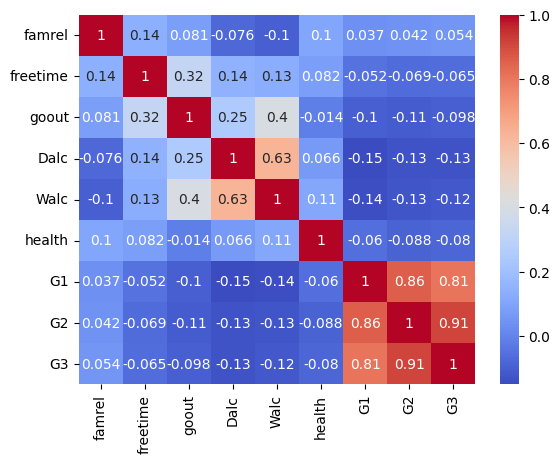

In [373]:
sns.heatmap(corr,annot=True,cmap='coolwarm')

<Axes: xlabel='health', ylabel='G3'>

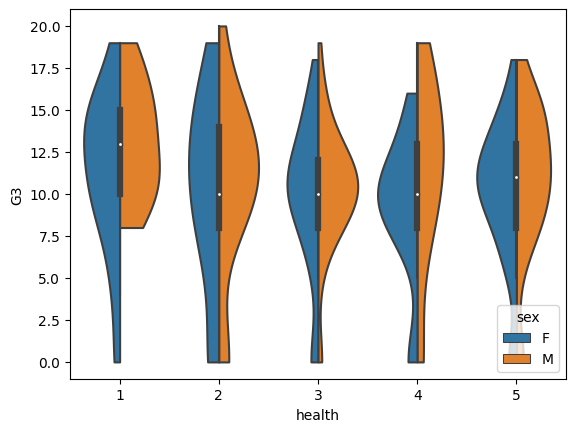

In [374]:
# Tweaking violin plot Adding the Sex parameter 
sns.violinplot(x='health',y='G3',cut=0,hue='sex',data=df_math,split=True)

<Axes: xlabel='health', ylabel='G3'>

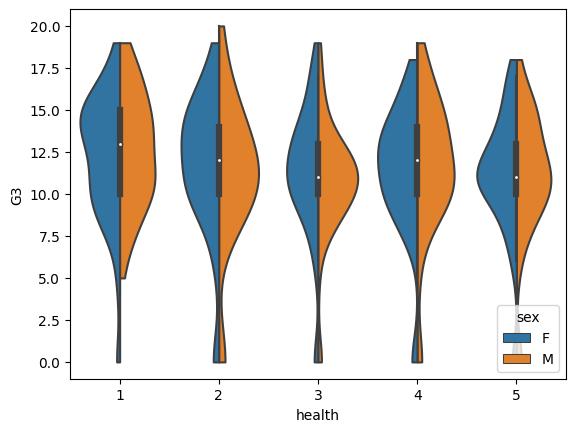

In [375]:
# Tweaking violin plot Adding the Sex parameter 
sns.violinplot(x='health',y='G3',cut=0,hue='sex',data=df,split=True)

### Inference 2 (Health and Sex)
Males tend to score higher accross all the health sections. Also interestingly Males in health 1 their least score is 7.5 I think this is the reason why the above analysis was showing that student having health =1 were scoring one so A more accurate analysis would be males Having health = 1 are scoring more than the others (Furhter Analysis requried )

In [376]:
#  Lets analyse the males a bit in depth
df_math.groupby(['sex','health'])['health'].count() 

sex  health
F    1         31
     2         25
     3         52
     4         37
     5         63
M    1         16
     2         20
     3         39
     4         29
     5         83
Name: health, dtype: int64

In [377]:
#  Lets analyse the males a bit in depth
df.groupby(['sex','health'])['health'].count() 

sex  health
F    1          96
     2          75
     3         127
     4         102
     5         191
M    1          41
     2          48
     3          88
     4          72
     5         204
Name: health, dtype: int64

In [378]:

fig = go.Figure()
x='romantic'

fig.add_trace(go.Violin(y=df_student['G3'][ df_student[x] == 'no'],
                        name='no',
                        #side='negative',
                        line_color='blue')
             )
fig.add_trace(go.Violin(y=df_student['G3'][ df_student[x] == 'yes'],
                        name='yes',
                        #side='positive',
                        line_color='red')
             )

fig.update_traces(box_visible=True)
fig.update_layout(title="Influence of romantic relationship on grades",
        yaxis_title="G3",
        violinmode='overlay')

fig.show()

In [379]:
fig = go.Figure()
var='romantic'

fig.add_trace(go.Violin(x=df_student['Subject'] [df_student[var] == 'no'],
                        y=df_student['G3'][ df_student[var] == 'no'],
                        name='no',
                        side='negative',
                        line_color='blue')
             )
fig.add_trace(go.Violin(x=df_student['Subject'] [df_student[var] == 'yes'],
                        y=df_student['G3'][ df_student[var] == 'yes'],
                        name='yes',
                        side='positive',
                        line_color='red')
             )

fig.update_traces(box_visible=True)
fig.update_layout(title="Influence of romantic relationship on grades",
                  xaxis_title='Subject (0:Por, 1:Math)',
                  yaxis_title="G3",
                  violinmode='overlay')

fig.show()

In [380]:
df_student.groupby(['Subject','romantic'])['G3'].agg(['mean','median'])


mean  median
Subject romantic                   
0       no        12.129268    12.0
        yes       11.523013    12.0
1       no        10.836502    11.0
        yes        9.575758    11.0

In [381]:
def violin_plot_rom(numX, grade):
  fig = go.Figure()
  var='romantic'

  fig.add_trace(go.Violin(x=df_student[numX] [df_student[var] == 'no'],
                        y=df_student[grade][ df_student[var] == 'no'],
                        name='no',
                        side='negative',
                        line_color='blue')
                )
  fig.add_trace(go.Violin(x=df_student[numX] [df_student[var] == 'yes'],
                        y=df_student[grade][ df_student[var] == 'yes'],
                        name='yes',
                        side='positive',
                        line_color='red')
                )

  fig.update_traces(box_visible=True)
  fig.update_layout(xaxis_title=numX,
                  yaxis_title=grade,
                  violinmode='overlay',
                  title="Impact of {} and romantic relationship on {}".format(numX, grade))

  fig.show()

In [382]:
for col in features_num.columns:
  violin_plot_rom(col,'G3')

### Impact of alcohol consumption on grade

In [383]:
fig = px.scatter(df_student, y="G3", x="Dalc", color="romantic", width=400, height=500)
fig.show()

In [384]:
fig = px.scatter(df_student, y="G3", x="Dalc", facet_col="romantic", width=800, height=500)
fig.show()
     

In [385]:
fig = px.scatter(df_student, y="G3", x="Walc", color="romantic", width=400, height=500)
fig.show()

In [386]:
fig = px.scatter(df_student, y="G3", x="Walc", facet_col="romantic", width=800, height=500)
fig.show()

### Health and alcohol consumption

In [387]:
df_hAlc=df_student.groupby(['health','Dalc']).size().reset_index(name='count')
print(df_hAlc)

    health  Dalc  count
0        1     1     99
1        1     2     24
2        1     3      7
3        1     4      3
4        1     5      4
5        2     1     87
6        2     2     25
7        2     3     10
8        2     4      1
9        3     1    167
10       3     2     26
11       3     3      9
12       3     4      8
13       3     5      5
14       4     1    123
15       4     2     34
16       4     3      3
17       4     4      5
18       4     5      9
19       5     1    251
20       5     2     87
21       5     3     40
22       5     4      9
23       5     5      8


In [388]:
fig = px.scatter_3d(df_hAlc,x='health',y='Dalc',z='count')
fig.show()

In [389]:
df_hAlc[['health','count']][df_hAlc['Dalc']==2]

,health,count
1,1,24
6,2,25
10,3,26
15,4,34
20,5,87


In [390]:
def hAlc_plot(alc_val):
  dfsub=df_hAlc[['health','count']][df_hAlc['Dalc']==alc_val]
  fig = px.scatter(dfsub,x='health',y='count', title='Dalc = {}'.format(alc_val))
  fig.show()

In [391]:
for i in df_hAlc['Dalc']:
  hAlc_plot(i)

## Inferences:
1) As expected, the grades are positively correlated with the quality of family relationships, but negatively correlated with alcohol consumption. However, the former positive correlation is weak.

2) The grades are negatively correlated with student's free time after school and the frequency they go out with friends after school. Here, "freetime" and "goout" need clarifications. If "free time" and "goout" means the time that the student spends on non-academic activities, then of course these factors will negatively impact student's grades. However, in general, students can also do productive activities during their free time after school and with friends, e.g, sports, studying together, band practice etc.

3) At first, I am surprised that the grades are negatively correlated with student's health, albeit weakly. However, I notice that health is (ironically) also positively correlated with the student's alcohol consumption and "freetime", so the negative impact on grades may be related to the student's alcohol consumption.

4) In general, students who are not in romantic relationships perform better than students who are in romantic relationships. This effect is more noticeable in mathematics than in portuguese.